In [1]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

climate = bpd.read_csv('../../data/climate.csv')

# Line graphs

Like scatter plots, {dterm}`line graphs` are useful for visualizing the relationship between two numerical variables. Unlike scatter plots, however, line graphs assume that for any given "x" value, there is a unique "y" value. We often use line graphs for visualizing how a numerical variable changes over time.

Line graphs are constructed similarly to scatter plots. We start by choosing "x" and "y" variables and plot each (x, y) pair as a point. We then draw line segments between each consecutive pair of points when ordered by their "x" values. The straight line segments have the effect of emphasizing the trend in "y" as "x" increases.

## Trends over time

It is well known that the global climate is changing, and many regions are experiencing warmer average temperatures today than they did a century ago. We can see just how temperatures in the United States have changed with a simple line graph.

Our goal is to plot the average temperature per year since 1898. To do so, we'll first need to group by year and aggregate using `.mean()`:

In [34]:
average_temperatures_by_year = climate.groupby('year').mean()
average_temperatures_by_year

,month,temperature,rainfall,zndx
year,,,,
1898,6.5,50.659259,2.568796,0.005926
1899,6.5,50.170370,2.528333,-0.075926
1900,6.5,51.824074,2.652778,-0.080000
1901,6.5,50.826852,2.486944,-0.392222
1902,6.5,50.623148,2.706481,0.153148
...,...,...,...,...
2015,6.5,53.503704,2.918519,0.123704
2016,6.5,54.004630,2.716852,-0.147130
2017,6.5,53.592593,2.838056,0.196667


While this table contains all of the information we're interested in, it is hard to identify any trends. Let's instead use a line graph to visualize the data. To create a line graph, we use the `.plot()` method with `kind='line'`. We'll use the temperature as the "y" variable, and the year as the "x" variable. Note, however, that the year is actually in the table's *index*, which is not a column. If we want to use the index as our "x" variable, we write `x=None`, as below:

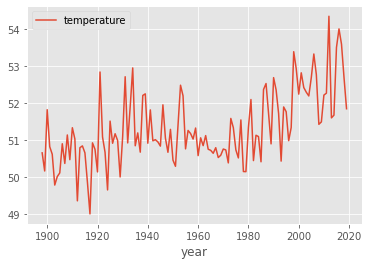

In [52]:
average_temperatures_by_year.plot(kind='line', x=None, y='temperature');

In fact, the default behavior of `.plot` is to use the index as the "x" value. This means that we can omit the `x=` keyword argument entirely and the index will be used:

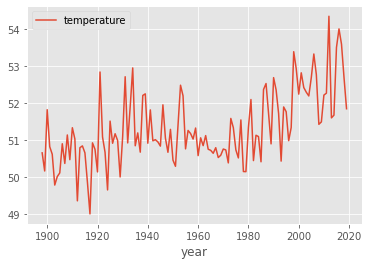

In [51]:
average_temperatures_by_year.plot(kind='line', y='temperature');

```{warning}
Note that omitting the `x=` keyword argument does *not* work for scatter plots. It works on most other types of plots, though!
```

These plots show that the unfortunate trend: temperatures have been steadily increasing over the last few decades, at least.

```{margin}
In the last section we argued against including all of the climate regions in one visualization, since they are so different. Why is it OK to do so here? You can verify that the same warming trend occurs in *every* climate region, and therefore it is not misleading to show the overall trend.
```

## Misleading scales

When interpreting a visualization, you should always pay special attention to the *scale* of the x- and y-axes. By manipulating these scales, it is possible to make trends appear and disappear.

Consider the plot above. The default behavior of pandas is to choose the scale of the y-axis so as to minimize empty space. In this case, the default axis ranges from 49 degrees to about 55 degrees. As a consequence, the line is more than *twice* as high in 2010 as it was in 1900. Of course, this doesn't mean that the temperature is twice as high as it was in 1900! Still, if our goal was to make the change in temperature appear as large as possible, this would be the scale we would use.

On the other hand, if we wished to *downplay* the change in temperature over the last century, we might change the y-axis so that it starts at zero and ends at 100. This "fixes" the issue with the line doubling in height, but it has the effect of obscuring the warming trend. We can see this by re-creating the plot above, this time with `ylim=(0, 100)`, which makes the lower and upper limits of the y-axis 0 degrees and 100 degrees, respectively.

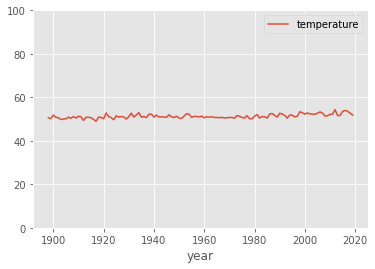

In [94]:
average_temperatures_by_year.plot(kind='line', y='temperature', ylim=(0, 100));

There isn't necessarily a single "correct" scale for a particular visualization. Therefore, when reading any type of graph, make sure you take a look at the scale of each axis before drawing conclusions!